Тестовая работа по анализу данных (EDA)
Школа - SkillFactory Учащийся - Шальнов Олег Группа - DST-35

Цель проекта

Провести первичный анализ данных из DataSet для определения параметров будующей модели по отслеживанию влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска и составить отчет по его результатам.

Задачи проекта

1. Первичная обработка данных
2. Оценка распределения признака для числовых переменных, устранение выбросов
3. Оценка количество уникальных значений для номинативных переменных
4. Преобразование данных (по необходимости)
5. Проведение корреляционного анализа количественных переменных
6. Отбор не коррелирующих переменных
7. Анализ номинативные переменных и остранение тех, которые не влияют на предсказываемую величину (score)
Исходные данные находятся в файле stud_math.csv

In [487]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [488]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [489]:
stud_math = pd.read_csv("stud_math.csv")


In [490]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Приведем наименование колонок к единому формату

In [491]:
stud_math.columns = [k.lower() for k in stud_math.columns] # наименования полей меленькими буквами

In [492]:
#stud_math.columns = [k.split(",")[0] for k in stud_math.columns] # наименование поля - одно слово
# Строка не пошла, потому что есть совпадение первых слов в наименовании, 
# поэтому переименовываем только один столбец
stud_math.rename(columns={'studytime, granular': 'granular'}, inplace = True)

In [493]:
stud_math.head()


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [494]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Всего таблица состоит из 395 строк и 30 столбцов (признаков): 13 числовых и 17 строковых (номинативных). Среди номинативных признаков даты/времени нет.

Теперь необходимо проанализировать каждое поле 


*school* - аббревиатура школы, в которой учится ученик 

In [495]:
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


В выборке участвуют ученики двух школ.
Все значения не нулевые. 
Предполагаем, что значения данного поля влияют на результат. Не удаляем

*sex* - пол ученика ('F' - женский, 'M' — мужской )

In [496]:
pd.DataFrame(stud_math.sex.value_counts())

,sex
F,208
M,187


Первичный анализ показывет, что исследовании принимают участие примерно одинаковое кол-во  девочек (208) и мальчиков (187). Пропусков нет.Значения, которые не соответствуют условиям задачи, отсутствуют. Однако данная пропорция может измениться после проведени анализа значений других полей в выборке (удаление наблюдений для исключения пропусков и выбросов в других полях).    

*age* - возраст ученика (от 15 до 22)

Числовой столбец. Пропущенных значений (NaN) нет. Проведем анализ 


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

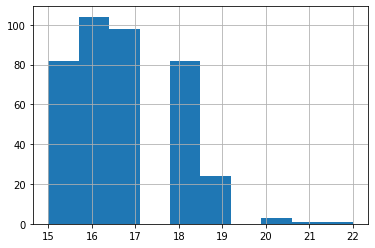

In [497]:
stud_math.age.hist()
stud_math.age.describe()

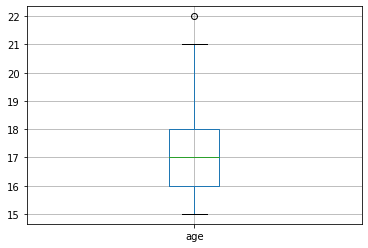

In [498]:
stud_math.boxplot(column=['age'])

In [499]:
dsc = stud_math.age.describe()

In [500]:
IQR = dsc['75%'] - dsc['25%']

In [501]:
# Покажем количество наблюдений, которые не характерны для общей статистической   
len(stud_math[stud_math.age>(dsc['75%'] + 1.5*IQR)])

1

In [502]:
len(stud_math[stud_math.age<(dsc['25%'] - 1.5*IQR)])

0

Значения 'age' смещены вправо, это значит, наблюдения содержат больше информаци по младшим ученикам, чем по старшим. Значения поля соответcтвуют условиям задачи (возраст ученика от 15 до 22 лет).  
Есть разрыв данных по возрасной группе 17-18 лет (?). 
Есть выбросы: одно нетипичное наблюдение - возраст студента больше 21 года - кандидат на удаление (?). 


*address* - тип адреса ученика ('U' - городской, 'R' - за городом) 

In [503]:
stud_math.address

0      U
1      U
2      U
3      U
4      U
      ..
390    U
391    U
392    R
393    R
394    U
Name: address, Length: 395, dtype: object

In [504]:
stud_math.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

Из 395 наблюдений:
295 учеников живет в городе, 
83 - за городом, 
у 17 учеников тип адреса не проставлен (кандидаты на удаление?). Значения, которые не соответствуют условиям задачи, отсутствуют

*famsize* - размер семьи('LE3' <= 3, 'GT3' >3)


In [505]:
stud_math.famsize.value_counts(dropna=False)

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

Из 395 наблюдений: 295 учеников живет в городе, 83 - за городом, у 17 учеников тип адреса не проставлен (пропуски, кандидаты на удаление?). Значения, которые не соответствуют условиям задачи, отсутствуют

*pstatus* - статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [506]:
stud_math.pstatus.value_counts(dropna=False)

T      314
NaN     45
A       36
Name: pstatus, dtype: int64

Из 395 наблюдений: родители 314 учеников живут вместе, 36 - раздельно, по 45 наблюденям данные отсутствую (пропуски, кандидаты на удаление?). Пропущенных значений больше, чем записей с признаком раздельного проживания родителей. Значения, которые не соответствуют условиям задачи, отсутствуют


*medu* — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [507]:
stud_math.medu.value_counts(dropna=False)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: medu, dtype: int64

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

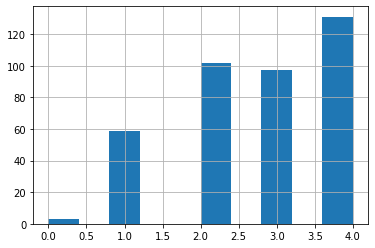

In [508]:
stud_math.medu.hist()
stud_math.medu.describe()

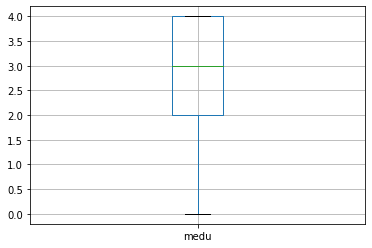

In [509]:
stud_math.boxplot(column=['medu'])

Значения, которые не соответствуют условиям задачи, отсутствуют. Пропущено всего 3 значения. Мамы более половины учеников имеют высшее, среднее или среднее специальное образование. Хотя не типичным является отсутствие образования у матери, предлагается не считать это выбросом на данном этапе. 

*fedu* — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [510]:
stud_math.fedu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: fedu, dtype: int64

Присутствует 1 значение, которое не соответствует условиям задачи. Предполагается опечатка. Заменим на 4.0. 

In [511]:
stud_math.loc[stud_math.index[stud_math['fedu'] == 40.0], 'fedu']=4


In [512]:
stud_math.fedu.value_counts(dropna=False)

2.0    106
3.0     96
4.0     89
1.0     78
NaN     24
0.0      2
Name: fedu, dtype: int64

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

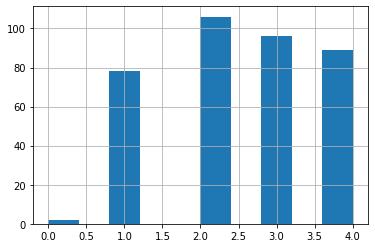

In [513]:
stud_math.fedu.hist()
stud_math.fedu.describe()

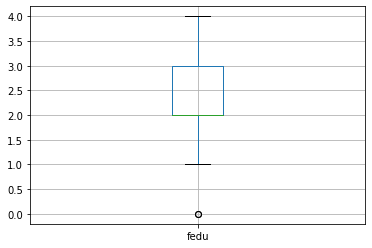

In [514]:
stud_math.boxplot(column=['fedu'])

Пропущено 24 значения. Папы учеников не такие образованные как мамы (средний уровень образованности 2.75 у мам против 2.51 у пап). Уровень образования отцов в выборке ближе к нормальному распределению, смещенному вправо. Хотя не типичным является отсутствие образования у отцов, предлагается не считать это выбросом на данном этапе. 

*mjob* — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое

In [515]:
stud_math.mjob.value_counts(dropna=False)

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: mjob, dtype: int64

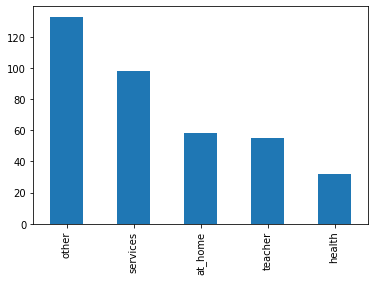

In [516]:
stud_math.mjob.value_counts().plot(kind='bar')

Пропущено 19 значений. Мамы большинства ученииков работают в других сферах (133 + 1[измененная запись]) или на государственной службе (97). Значения, которые не соответствуют условиям задачи, отсутствуют.


*fjob* — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое

In [517]:
stud_math.fjob.value_counts(dropna=False)

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

Пропущено 36 значений. Папы большинства ученииков работают в других сферах (197) или на государственной службе (102). Значения, которые не соответствуют условиям задачи, отсутствуют.

*reason* — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [518]:
stud_math.reason.value_counts(dropna=False)

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

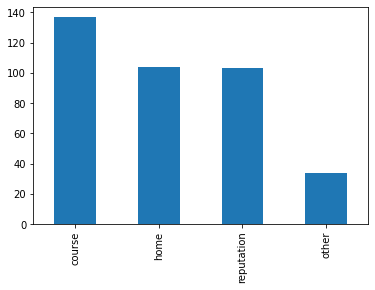

In [519]:
stud_math.reason.value_counts().plot(kind = 'bar' )

Для большинства учеников выбор школы основан на критерии "Образовательная программа", которую дает школа. Далее идут критерии "Близость к дому" и "Репутация" (примерно равны). Есть пропуски данных (17 записей). Значения, которые не соответствуют условиям задачи, отсутствуют. 

*guardian* — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [520]:
stud_math.guardian.value_counts(dropna=False)

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

В большинстве случаев опекуном в школе считают маму (250 или 63% учеников), на втором месте папы (85 или 26% учеников). Замыкает список категория "Другие" - 29 или 7% учеников). Пропуск данных присутствует (31 запись). Значения, которые не соответствуют условиям задачи, отсутствуют.  

*traveltime* — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.

In [521]:
 stud_math.traveltime.value_counts(dropna=False)

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

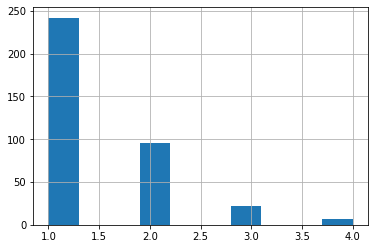

In [522]:
stud_math.traveltime.hist()
stud_math.traveltime.describe()

У большинства учеников время в пути до школы не более 15 минут (странно с учетом анализа поля reason, что близость к школе это не главное).  
8 учеников (7+1 добавленный), которые тратят больше 60 минут на дорогу. Пропуск данных присутствует (28 записей)   

*studytime* — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [523]:
 stud_math.studytime.value_counts(dropna=False)

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

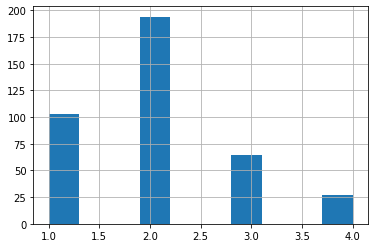

In [524]:
stud_math.studytime.hist()
stud_math.studytime.describe()

Большинство студентов тратят на учебу помимо школы от 2 до 2,5 часов в день. Есть пропуски в данных (7). В целом данные соответствуют нормальному распределению со смещением вправо. Значения, которые не соответствуют условиям задачи, отсутствуют.

*failures* — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [525]:
stud_math.failures.value_counts(dropna=False)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

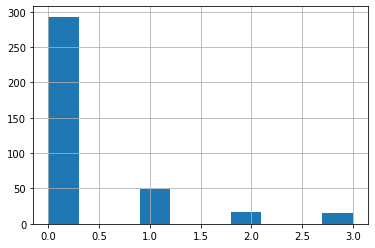

In [526]:
stud_math.failures.hist()
stud_math.failures.describe()

Значения, которые не соответствуют условиям задачи, отсутствуют. Есть пропуски значений (22). Однако сам критерий не очень информативный: школьники, которые не потерпели неудач вовсе или потерпели более 3 неудач приравниваются к одной категории (0 неудач). 

*schoolsup* — дополнительная образовательная поддержка (yes или no)

In [527]:
stud_math.schoolsup.value_counts(dropna=False)

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

Большинство учеников не посещают дополнительных занятий. Есть пропуски данных (9). Значения сооветствуют заданным критериям. Гипотеза: необходимо преобразовать данные в 0 (no) и в 1 (yes). 

In [528]:
import numpy as np

In [529]:
stud_math['schoolsup'] = np.where(stud_math['schoolsup'] == 'no', 0, stud_math['schoolsup'])
stud_math['schoolsup'] = np.where(stud_math['schoolsup'] == 'yes', 1, stud_math['schoolsup'])

In [530]:
stud_math

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,0,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,0,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,0,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,0,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [531]:
# Проверка, что ничего не изменилось
stud_math.schoolsup.value_counts(dropna=False) 

0.0    335
1.0     51
NaN      9
Name: schoolsup, dtype: int64

**Вопрос ментору**. На следующем шаге необходимо будет использовать к полям get_dummies и sklearn. А в случае такого преобразования к полю schoolsup надо будет применять get_dummies или мы говорим, что это бинарное поле?  

*famsup* — семейная образовательная поддержка (yes или no)

In [532]:
stud_math.famsup.value_counts(dropna=False)

yes    219
no     137
NaN     39
Name: famsup, dtype: int64

Больше половины учеников пользуются семейной образовательной поддержкой. Есть пропуски данных (39). Значения сооветствуют заданным критериям.

Преобразуем значение поля

In [533]:
stud_math['famsup'] = np.where(stud_math['famsup'] == 'no', 0, stud_math['famsup'])
stud_math['famsup'] = np.where(stud_math['famsup'] == 'yes', 1, stud_math['famsup'])

In [534]:
stud_math.famsup.value_counts(dropna=False)

1.0    219
0.0    137
NaN     39
Name: famsup, dtype: int64

*paid* — дополнительные платные занятия по математике (yes или no)

In [535]:
stud_math.paid.value_counts(dropna=False)

no     200
yes    155
NaN     40
Name: paid, dtype: int64

Больше половины учеников не берут дополнительные платные уроки по математике. Обнако доля занимающихся дополнительно почти 39%.  Есть пропуски данных (40). Значения сооветствуют заданным критериям.

Преобразуем значение поля

In [536]:
stud_math['paid'] = np.where(stud_math['paid'] == 'no', 0, stud_math['paid'])
stud_math['paid'] = np.where(stud_math['paid'] == 'yes', 1, stud_math['paid'])

*activities* — дополнительные внеучебные занятия (yes или no)

In [537]:
stud_math.activities.value_counts(dropna=False)

yes    195
no     186
NaN     14
Name: activities, dtype: int64

49% учащихся имеют дополнительную активность по внеучебным занятиям. Есть пропуски данных. Значения соответствуют заданным критериям. 

Преобразуем значения поля.

In [538]:
stud_math['activities'] = np.where(stud_math['activities'] == 'no', 0, stud_math['activities'])
stud_math['activities'] = np.where(stud_math['activities'] == 'yes', 1, stud_math['activities'])

*nursery* — посещал детский сад (yes или no)

In [539]:
stud_math.nursery.value_counts(dropna=False)

yes    300
no      79
NaN     16
Name: nursery, dtype: int64

76% учащихся ходили в дошкольные учебные заведения (дет.сад). Есть пропуски в данных (16). Значения соответствуют заданным критериям. 

Преобразуем данные.

In [540]:
stud_math['nursery'] = np.where(stud_math['nursery'] == 'no', 0, stud_math['nursery'])
stud_math['nursery'] = np.where(stud_math['nursery'] == 'yes', 1, stud_math['nursery'])

granular - поле, описание которого не дано в задании, но оно присутствует в выборке

Описания поля в задании нет. Несмотря на это необходимо провести анализ данных в выборке 

In [541]:
stud_math.granular.value_counts(dropna=False)

-6.0     194
-3.0     103
-9.0      64
-12.0     27
 NaN       7
Name: granular, dtype: int64

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular, dtype: float64

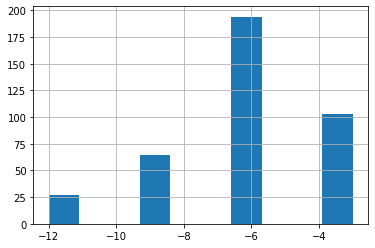

In [542]:
stud_math.granular.hist()
stud_math.granular.describe()

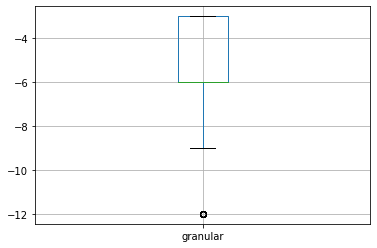

In [543]:
stud_math.boxplot(column=['granular'])

In [544]:
dsc = stud_math.granular.describe()
IQR = dsc['75%'] - dsc['25%']
len(stud_math[stud_math.granular>(dsc['75%'] + 1.5*IQR)])
len(stud_math[stud_math.granular<(dsc['25%'] - 1.5*IQR)])

27

Параметр имеет нормальное распределение со смещением влево. Есть пропуски данных (7). Также есть 27 записей выбросов. Так как нет описание поля, провести оценку выбросов не представляется возможным. Соответствие значениям полей также оценить невозможно. анализ данного атрибута должен быть проведен позднее при построении корреляционной матрицы 

*higher* — хочет получить высшее образование (yes или no)

In [545]:
stud_math.higher.value_counts(dropna=False)

yes    356
NaN     20
no      19
Name: higher, dtype: int64

В планах 90% учащихся поступить в высшее учебное заведение. Есть пропуски в данных (20). Значения соответствуют заданным критериям. 

Преобразуем данные.

In [546]:
stud_math['higher'] = np.where(stud_math['higher'] == 'no', 0, stud_math['higher'])
stud_math['higher'] = np.where(stud_math['higher'] == 'yes', 1, stud_math['higher'])

*internet* — наличие интернета дома (yes или no)

In [547]:
stud_math.internet.value_counts(dropna=False)

yes    305
no      56
NaN     34
Name: internet, dtype: int64

У 77% учащихся есть доступ в сеть Интернет. Есть пропуски в данных (34). Значения соответствуют заданным критериям.

Преобразуем данные.

In [548]:
stud_math['internet'] = np.where(stud_math['internet'] == 'no', 0, stud_math['internet'])
stud_math['internet'] = np.where(stud_math['internet'] == 'yes', 1, stud_math['internet'])

*romantic* — в романтических отношениях (yes или no)

In [549]:
stud_math.romantic.value_counts(dropna=False)

no     240
yes    124
NaN     31
Name: romantic, dtype: int64

60% учеников не состоят в романтических отношениях.  Есть пропуски в данных (31). Значения соответствуют заданным критериям.

Преобразуем данные.

In [550]:
stud_math['romantic'] = np.where(stud_math['romantic'] == 'no', 0, stud_math['romantic'])
stud_math['romantic'] = np.where(stud_math['romantic'] == 'yes', 1, stud_math['romantic'])

*famrel* — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [551]:
stud_math.famrel.value_counts(dropna=False)

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Присутствует 1 значение, которое не соответствует условиям задачи. Предполагается опечатка. Заменим на 1.0.

In [552]:
stud_math.loc[stud_math.index[stud_math['famrel'] == -1.0], 'famrel']=1.0

In [553]:
stud_math.famrel.value_counts(dropna=False)

4.0    182
5.0     99
3.0     62
NaN     27
2.0     17
1.0      8
Name: famrel, dtype: int64

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

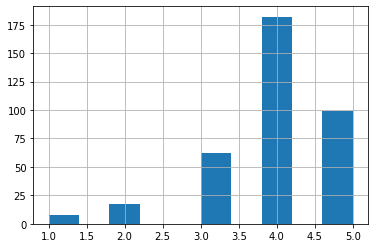

In [564]:
stud_math.famrel.hist()
stud_math.famrel.describe()

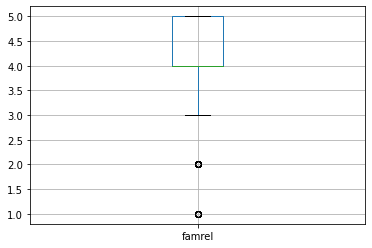

In [558]:
stud_math.boxplot(column=['famrel'])


In [559]:
dsc = stud_math.famrel.describe()
IQR = dsc['75%'] - dsc['25%']
len(stud_math[stud_math.famrel>(dsc['75%'] + 1.5*IQR)])
len(stud_math[stud_math.famrel<(dsc['25%'] - 1.5*IQR)])

25

71% учащихся оценили свои семейные отношения как хорошие и очень хорошие. Есть пропуски данных (27). Параметр имеет нормальное распределение со смещением влево. Есть 25 наблюдений, которые классифицируются как выбросы (значения 1 и 2).  


*freetime* — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [560]:
stud_math.freetime.value_counts(dropna=False)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

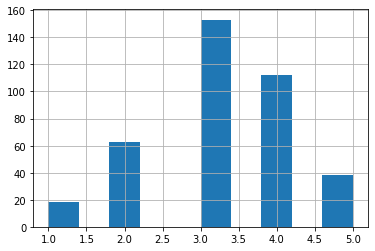

In [565]:
stud_math.freetime.hist()
stud_math.freetime.describe()

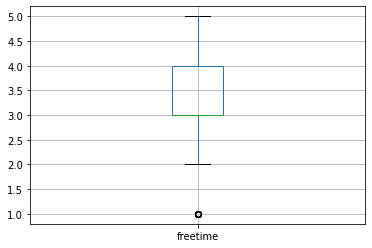

In [566]:
stud_math.boxplot(column=['freetime'])

In [567]:
dsc = stud_math.freetime.describe()
IQR = dsc['75%'] - dsc['25%']
len(stud_math[stud_math.freetime>(dsc['75%'] + 1.5*IQR)])
len(stud_math[stud_math.freetime<(dsc['25%'] - 1.5*IQR)])

18

Параметр имеет нормальное распределение со смещением влево. 18 (4,56%) учащихся оценили признали, что у них мало свободного вреени (выброс).Большинство же учащихся (153 или 38%) оценили свою занятость как среднюю. Есть пропуски данных (11). Значения соответствуют заданным критериям. 


*goout* — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [568]:
stud_math.goout.value_counts(dropna=False)

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

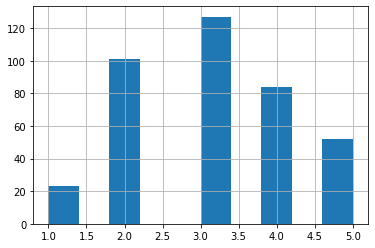

In [570]:
stud_math.goout.hist()
stud_math.goout.describe()

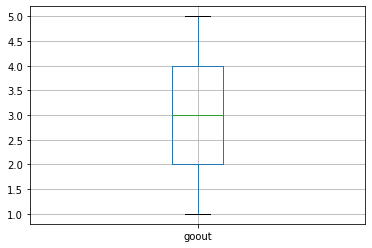

In [572]:
stud_math.boxplot(column='goout')

In [571]:
dsc = stud_math.goout.describe()
IQR = dsc['75%'] - dsc['25%']
len(stud_math[stud_math.goout>(dsc['75%'] + 1.5*IQR)])
len(stud_math[stud_math.goout<(dsc['25%'] - 1.5*IQR)])

0

Параметр имеет нормальное распределение со смещением влево. Значения соответствуют заданным критериям. При формировании корреляционной матрицы необходимо изучить зависмость от параметра свободного времени 

*health* — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)


In [573]:
stud_math.health.value_counts(dropna=False)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

Большинство учащихся (138 или 35% )оценили свое здоровье на отлично - Параметр имеет нормальное распределение со смещением влево. Значения соответствуют заданным критериям. Есть пропуски данных (15). 

*absences* Текст, выделенный полужирным шрифтом — количество пропущенных занятий

In [574]:
stud_math.absences.value_counts(dropna=False)

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

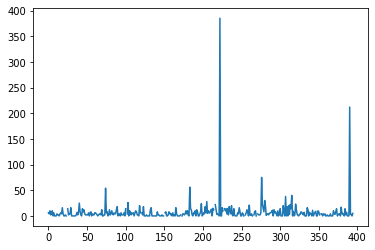

In [576]:
stud_math.absences.plot()

In [577]:
stud_math.absences.max()


385.0

In [579]:
stud_math.absences.min()

0.0

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

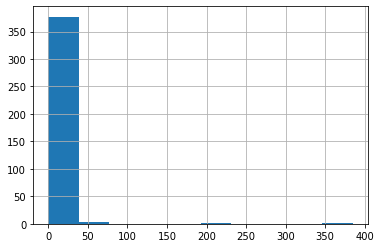

In [583]:
stud_math.absences.hist()
stud_math.absences.describe()

In [586]:
dsc = stud_math.absences.describe()
IQR = dsc['75%'] - dsc['25%']
print(len(stud_math[stud_math.absences>(dsc['75%'] + 1.5*IQR)]))
len(stud_math[stud_math.absences<(dsc['25%'] - 1.5*IQR)])

17


0

Максимальное значения параметра - 385 дней (отсутствие более календарног года) - выброс. В общем модель классифицирует 17 наблюдений как выбросы. Также есть учащиеся (111 или 28%), которые вообще не пропускали занятий. Есть пропуски в данных.

*score* — баллы по госэкзамену по математике

In [588]:
stud_math.score.value_counts(dropna=False)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

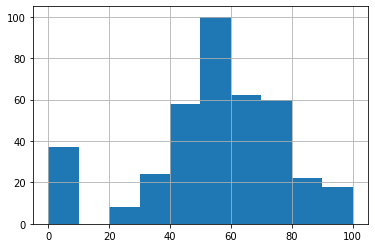

In [591]:
stud_math.score.hist()
stud_math.score.describe()

In [593]:
dsc = stud_math.score.describe()
IQR = dsc['75%'] - dsc['25%']
print('Количество наблюдений, считающихся выбросом (слева):', 
      len(stud_math[stud_math.score<(dsc['25%'] - 1.5*IQR)]))
print('Количество наблюдений, считающихся выбросом (справа):',
      len(stud_math[stud_math.score>(dsc['75%'] + 1.5*IQR)]))
dsc

Количество наблюдений, считающихся выбросом (слева): 0
Количество наблюдений, считающихся выбросом (справа): 0


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Парамет имеет нормальное распределение, смещенное влево. Максимальное значение - 100 баллов (1 учащийся), есть 37 (!!!) учащихся, которые получили оценку 0. Причем выбросов не обнаружено, все набдюдения находятся в интервале 0-100 баллов. Есть пропуски в данных - 6 записей

Постоим корреляционную матицу и сделаем вывод

In [594]:
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.015556,0.067415,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.078589,-0.014459,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.012896,-0.026122,-0.025892,0.042663,0.023862,0.022572,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,0.102206,-0.021542,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,-1.000000,0.039555,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.178992,-0.009110,0.098382,0.120914,0.081284,0.057391,-0.344338
granular,0.015556,-0.078589,-0.012896,0.102206,-1.000000,0.178992,1.000000,-0.039555,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,-0.039555,1.000000,0.172751,0.077167,0.086309,-0.083064,0.055305
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.121969,0.172751,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.051280,0.077167,0.296437,1.000000,-0.015608,-0.048738,-0.129685


**Выводы**

1. По набору данных:
  - в самих признаках достаточно мало пустых значений, но если применить команду для удаления всех пропусков stud_math.dropna(), , то из 395 наблюдений останется только 97. Набор данных сформирован так, что пустые значения без потери качества не восстановить
  - найдены и исправлены некорректные значения (опечатки), выбросы найдены и оставлены до решения на урвне заказчика

2. По корреляционной матрице:
  - существенное положительное влияние на score оказывают поля medu, fedu, studytime
  существенное отрицательное влияние на score оказывают failures, age,goout 
  - поле granular оказалось полностью скорреллированным с studytime. Предложение - удалить. 

--------------


-----------------


PS или вместо послесловия (для ментора)

Работа сделана по методике, которая задана в первой части работы "Проект 2. Разведовательный анализ данных"

Я не профессионал в области анализа данных, поэтому к Вам вопрос, пройдет ли изложенный ниже подход? 



1. Общие работы с БД справдедливы и здесь

In [161]:
import pandas as pd
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
stud_math = pd.read_csv("stud_math.csv")
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [162]:
stud_math.columns = [k.lower() for k in stud_math.columns] # наименования полей меленькими буквами
stud_math.rename(columns={'studytime, granular': 'granular'}, inplace = True)

2. Рассмотрим поле score - мы же для прогнозирования его строем тестовую и проверочную выборки

Из 395 записей не NaN 389. Здесь развилка. Что значит Nan в результате выборки? Я бы удалил NaN (6 наблюдений).

In [163]:
stud_math=stud_math.dropna(subset=['score'])

In [164]:
stud_math

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Теперь проанализируем поле score

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

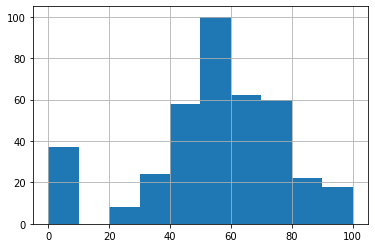

In [165]:
stud_math.score.hist()
stud_math.score.describe()

In [166]:
len(stud_math[stud_math.score==0.0])

37

In [167]:
# Сделать процедуру, на вход подать значение полей, на выходе структуру 
dsc = stud_math.score.describe()
IQR = dsc['75%'] - dsc['25%']
print('Количество наблюдений, считающихся выбросом (слева):', 
      len(stud_math[stud_math.score<(dsc['25%'] - 1.5*IQR)]))
print('Количество наблюдений, считающихся выбросом (справа):',
      len(stud_math[stud_math.score>(dsc['75%'] + 1.5*IQR)]))
dsc

Количество наблюдений, считающихся выбросом (слева): 0
Количество наблюдений, считающихся выбросом (справа): 0


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Мы видем 37 записей с значениями score = 0. При этом данная ситуация выбросом не считается (укладывается в 1,5 межквартиных интервалов с обеих сторон). 
Посмотрим в целом на данные, по  которым нулевые значения score:  

In [168]:
display(stud_math[stud_math.score == stud_math.score.min()])

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


Если внимательно посмотреть на получившийся набор данных, то практичски в каждой строке есть признаки со значением NaN. Оставим пока как есть набор данных - вернемся в конце при конечном анализе результатов

3. Удаление из набора данных значения тех полей, которые мы не сможем восстановить/подменить. Критерий  - здравый смысл. 

In [169]:
stud_math.isna().sum()

school         0
sex            0
age            0
address       15
famsize       27
pstatus       45
medu           3
fedu          24
mjob          19
fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        38
paid          39
activities    14
nursery       15
granular       7
higher        20
internet      34
romantic      31
famrel        27
freetime       9
goout          7
health        15
absences      11
score          0
dtype: int64

Поясню, как работает здравый смысл на примере.
Значения NaN в номинативных переменных нам не восстановить: address, famsize, pstatus, mjob, и тд. 
Далее, например, по образованию матери или отца есть численный диапазон, но в конце придем к тому, что среднене, максимальное или предыдущее значение не поставишь. Исходя из описанной логики, приходим, к тому, что сразу надо удалять все записи с NaN.

In [170]:

df=pd.DataFrame() # При проверке гипотезы получим новый DF, 
                  # чтобы при необходимости вернуться к предыдущим
                  # результатам 
df=stud_math.copy()
df=df.dropna()

#for col in df:
#    df=df.dropna(subset=[col])  #

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      97 non-null     object 
 1   sex         97 non-null     object 
 2   age         97 non-null     int64  
 3   address     97 non-null     object 
 4   famsize     97 non-null     object 
 5   pstatus     97 non-null     object 
 6   medu        97 non-null     float64
 7   fedu        97 non-null     float64
 8   mjob        97 non-null     object 
 9   fjob        97 non-null     object 
 10  reason      97 non-null     object 
 11  guardian    97 non-null     object 
 12  traveltime  97 non-null     float64
 13  studytime   97 non-null     float64
 14  failures    97 non-null     float64
 15  schoolsup   97 non-null     object 
 16  famsup      97 non-null     object 
 17  paid        97 non-null     object 
 18  activities  97 non-null     object 
 19  nursery     97 non-null     ob

Получили выборку без NaN из 97 наблюдений. 
Вернемся к анализу знаячений score

In [172]:
stud_math.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

count    97.000000
mean     52.061856
std      21.049948
min       0.000000
25%      40.000000
50%      55.000000
75%      65.000000
max      95.000000
Name: score, dtype: float64

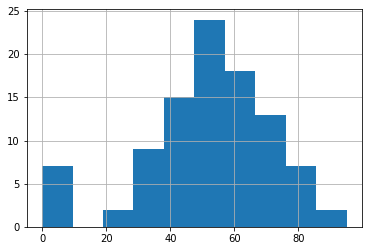

In [173]:
df.score.hist()
df.score.describe()


In [174]:
len(df[df.score == 0.0])

7

Что изменилось: 

граница 3-его квартиля (было 70, стало 65), 
максимум (было - 100, стало - 95), 
среднее (было - 52.26, стало 52.06)
отклонение (было -22.91, стало - 21.05)

Что не поменялось:
распределение - нормальное, форма смещения - левая (среднее меньше медианы)
минимум (0), граница 1-го квартиля (40), медиана (55)  

In [175]:
dsc = df.score.describe()
IQR = dsc['75%'] - dsc['25%']
print('Количество наблюдений, считающихся выбросом (слева):', 
      len(df[df.score<(dsc['25%'] - 1.5*IQR)]))
print('Количество наблюдений, считающихся выбросом (справа):',
      len(df[df.score>(dsc['75%'] + 1.5*IQR)]))

Количество наблюдений, считающихся выбросом (слева): 7
Количество наблюдений, считающихся выбросом (справа): 0


В результате проведенных операций нулевые значения в score трактуются теперь как выброс. Форма распределения практически не изменилась. И есть увереннось в достоверности данных (ничего не придумано, никаких дополнительных подстановок). 

Открытый вопрос: хватит ли ~90 записей (после всех преобразований) для формирования обучающей и тестовой (контрольной) выборки.



Что дальше? Необходимо провести анализ значений каждого поля, как и в основной работе.  

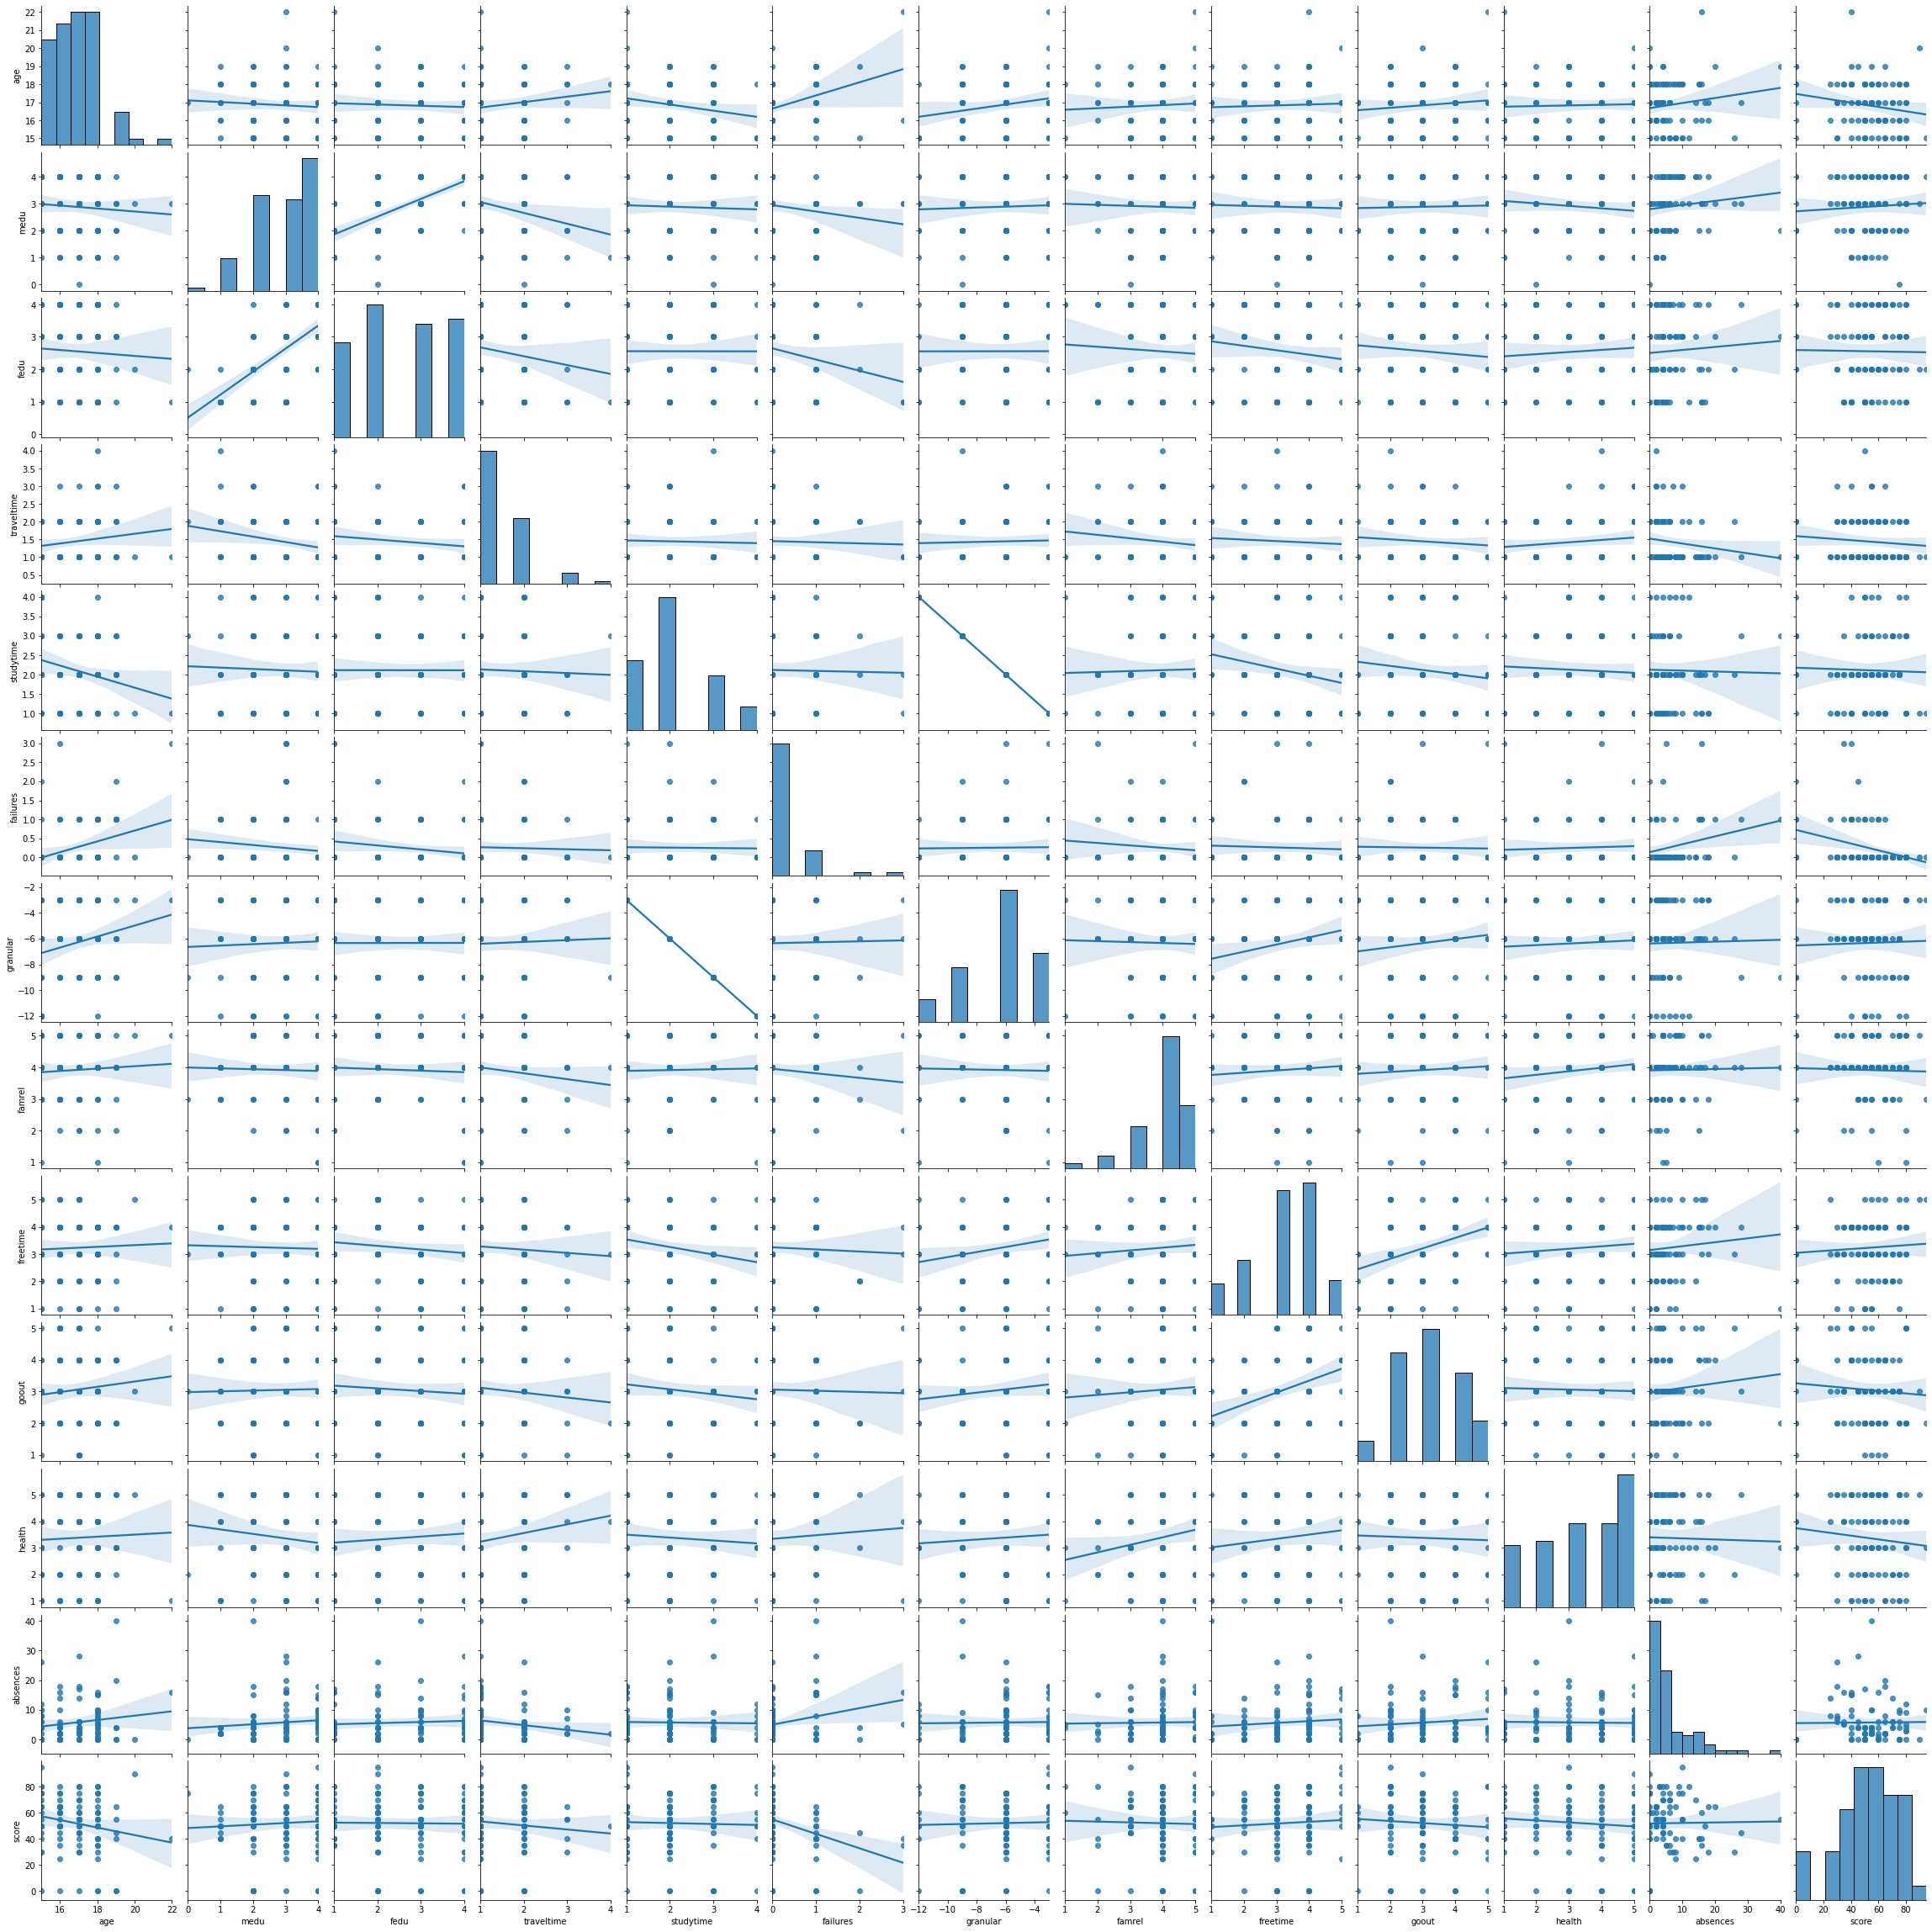

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, kind = 'reg')

In [177]:
df.corr()

,age,medu,fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.071662,-0.056929,0.143682,-0.220209,0.320914,0.220209,0.057039,0.040115,0.106748,0.037152,0.142780,-0.186407
medu,-0.071662,1.000000,0.684379,-0.248099,-0.042491,-0.135065,0.042491,-0.032146,-0.032350,0.023938,-0.124250,0.101253,0.064914
fedu,-0.056929,0.684379,1.000000,-0.162149,-0.001350,-0.189926,0.001350,-0.059084,-0.135575,-0.087894,0.086575,0.059172,-0.014236
traveltime,0.143682,-0.248099,-0.162149,1.000000,-0.034571,-0.029138,0.034571,-0.134113,-0.071376,-0.094331,0.147160,-0.148719,-0.094874
studytime,-0.220209,-0.042491,-0.001350,-0.034571,1.000000,-0.016541,-1.000000,0.025253,-0.226503,-0.129162,-0.067115,-0.018695,-0.029742
failures,0.320914,-0.135065,-0.189926,-0.029138,-0.016541,1.000000,0.016541,-0.095520,-0.043110,-0.021022,0.057279,0.239602,-0.314698
granular,0.220209,0.042491,0.001350,0.034571,-1.000000,0.016541,1.000000,-0.025253,0.226503,0.129162,0.067115,0.018695,0.029742
famrel,0.057039,-0.032146,-0.059084,-0.134113,0.025253,-0.095520,-0.025253,1.000000,0.084336,0.069922,0.178145,0.016312,-0.026742
freetime,0.040115,-0.032350,-0.135575,-0.071376,-0.226503,-0.043110,0.226503,0.084336,1.000000,0.381049,0.120714,0.093512,0.068862
goout,0.106748,0.023938,-0.087894,-0.094331,-0.129162,-0.021022,0.129162,0.069922,0.381049,1.000000,-0.033206,0.094859,-0.079187
